In [38]:
########################################
# IF CODE CRASHES THEN RE-RUN THE CODE #
# POSSIBLE REASONS: INTERNET SLOW DOWN #
# WHILE EXECUTING THE CODE             #
########################################


# Packages
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import re



# Disable Chrome Browser Notification
option = Options()
option.add_argument("--disable-infobars")
option.add_argument("start-maximized")
option.add_argument("--disable-extensions")
option.add_experimental_option("prefs", { 
    "profile.default_content_setting_values.notifications": 1 
})


# Create driver session
driver = webdriver.Chrome(options=option,executable_path = '/Users/gourabsinha/Desktop/Data Science/Packages/chromedriver')


In [41]:
#Q1. Login to Instagram
"""
Answer: Here I have visited the site and then I found the input fields where I will need to 
input the user name and the password and then I have passed the inputs with the
send key function. Once these two fields are filled with correct username and password
I just clicked on the login button which I have found using button tag.
"""


driver.get('https://instagram.com/')

# Credentials
username = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, "username")))
password = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, "password")))
username.clear()
password.clear()
username.send_keys("sample")
password.send_keys("sample")

btn = driver.find_elements_by_tag_name("button")
btn[1].click()


In [42]:
#Q1
"""
Answer: In the above cell I have already logged in so now I have found out top 10 handles with their profile links which
will help me later to visit these user_handles after putting food in the search bar. Now I have all the profile links and we
can simply visit and get the followers count. I have made one function named get_follower_count which helps me to store added two things 
apart from the follower count and they are 
1. follower count
2. user_handle
3. profile like 
in the user_id_followers list. I will be using this list alot in the later questions. In the function I have passed one
list which contains the user_handle and the profile like and from that I am using the like to navigate to user profile and
fetch the above mentioned data. Once this process is done now we can have the top five user_handles according to their
followers count as I have sorted them on the basis of follower count. Now I have picked top five user_handle and displayed

"""


def get_follower_count(user_handle): 
    time.sleep(1)
    base_url = "https://instagram.com"
    driver.get(base_url+user_handle[1])
    time.sleep(2)
    tag = driver.find_element_by_partial_link_text("followers")
    data = BeautifulSoup(tag.get_attribute('outerHTML'),'html.parser').find('span').get('title')
    follower_count = int(data.replace(',',''))
    user_id_followers.append([follower_count,user_handle[0],user_handle[1]])



driver.get('https://instagram.com/')
search_input =    driver.find_element_by_xpath("//input[@placeholder='Search']")
search_input.clear()
search_input.send_keys("food")
user_ids = WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.XPATH, "//div[@class='fuqBx']//a")))

# Store user_handles with profile links
store_user_ids = []
for user_id in user_ids:
    html_content = user_id.get_attribute('outerHTML')
    data = BeautifulSoup(html_content,'html.parser').a['href']
    user_id = data.split('/')[1]
    if user_id!='explore':
        store_user_ids.append([user_id,data])
        

# Only 10 user id with there profile link
store_user_ids = store_user_ids[:10]

user_id_followers = []

    
for user_id in store_user_ids:
    get_follower_count(user_id)

# TOP FIVE USER HANDLES WITH FOLLOWERS, PROFILE LINK
user_id_followers.sort(reverse=True)
user_id_followers = user_id_followers[:5]
for user_id in user_id_followers:
    print(user_id)






[10167638, 'foodnetwork', '/foodnetwork/']
[9606389, 'foodys', '/foodys/']
[3769503, 'buzzfeedfood', '/buzzfeedfood/']
[3588433, 'foodgod', '/foodgod/']
[3319120, 'foodandwine', '/foodandwine/']


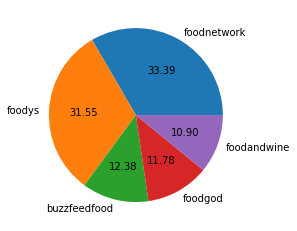

In [43]:
# Pie Graph just to get the idea which user_handle has more followers.
# NOTE: THIS ONE HAS BEEN ASKED BUT I HAVE DONE IT JUST TO GET THE CLEAR PICTURE.

counts = [i[0] for i in user_id_followers]
user_ids = [i[1] for i in user_id_followers]
plt.pie(counts,labels=user_ids,autopct="%.2f")
plt.show()



In [44]:
# Now Find the number of posts these handles have done in the previous 3 days.
"""
Answer: To solve this question I have made one function named post_date_check which is helping me to get the count of post
the user has done in last three days. Function takes one argument i.e the profile link and open the profile. Once that is
done, it clicks on the first post and then extract the date, now I am checking the days difference from current date, if the 
difference is less or equal to 3 then I will consider and increment the no_of_posts variable value. Whenever I encounter
difference is greater than 3 I will break and return the no_of_posts value and append this value to post_counts list.
NOTE: Try and except block have been used to handle the case if user doesn't have any post. After all I have made one
bar graph which shows the number of post done by the user in last three days. 

As of now it shows me foodnetwork has uploaded the most number of posts but it can change depending upon the user and
when you run the script.
"""
def post_date_check(user_url):
    base_url = "https://instagram.com"
    driver.get(base_url+user_url)
    time.sleep(2)

    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='v1Nh3 kIKUG  _bz0w']")))
    post.click()
    no_of_posts = 0
    try:
        while True:
            time_of_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//a[@class='c-Yi7']/time")))
            date_of_post = BeautifulSoup(time_of_post.get_attribute('outerHTML'),'html.parser').find('time').get('title')
            date_of_post = date_of_post.replace(',', '')
            post_date = datetime.strptime(date_of_post, '%b %d %Y').date()
            current_date = datetime.today().strftime('%Y-%m-%d')
            current_date = datetime.strptime(current_date, '%Y-%m-%d').date()
            difference_in_date = (current_date-post_date).days
            next_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div/a[@class=' _65Bje  coreSpriteRightPaginationArrow']")))
            next_post.click()
            if difference_in_date>3:
                break
                
            no_of_posts+=1
            time.sleep(2)
    except:
        return no_of_posts
        
    return no_of_posts;        
        
user_handles = []
post_counts = []
for user_detail in user_id_followers:
    user_handles.append(user_detail[1])
    post_count = post_date_check(user_detail[2])
    post_counts.append(post_count)
    time.sleep(3)
    




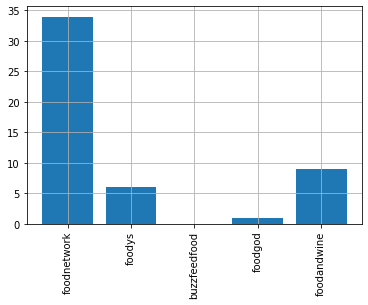

In [45]:
# Depict this information using a suitable graph.
plt.bar(user_handles,post_counts)
plt.xticks(rotation=90)
plt.grid()
plt.show()

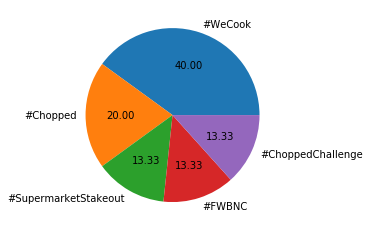

In [46]:
# Question 2.1-2.5

# Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
"""
Answer: In this script I have made two functions 
1. post_check which checks first 10 posts: contents, total likes & number of posts('Will be used for later questions') 
2. get_word_frequency which helps me to store the words - their frequence and the hastags - frequency.


The first function works in the similar fashion like the post_date_check function but here I have added one condition
that is to limit the checking to only first 10 posts. First it navigates to user profile then fetch the content
and append to the texts variable, after that it look for likes count, if it is not a video then it simply picks the like
count and increment total_likes by the value, but if it is a video then it clicks on the views and get the like count
after that it include to the total_likes. Once 10 posts details are fetch it return a list which contains three things
1. texts (all contents of 10 posts)
2. likes (total likes)
3. no of post(which can be avoided but I am storing this one just to make it generic function i.e it can handle n no of posts)



Second function takes three arguments 1. content which I have got from 10 posts 2. word_dictionary(to store the frequency)
3. hastag_dictionary(to store the hastags)
First thing it does is split string to get in the form of words list. Once that is done it iterate over all the possible words
and apply regex so that no special character comes in the word. After applying regex if word is not empty then check the
first character whether it is "#" or not, if it is # then store in the hastag_dictionary and increment the value otherwise
store in the word_dictionary. 


NOTE: I have answered all the Question 2 sub questions in this cell only with proper comments so that you can understand

"""

def post_check(user_url):
    base_url = "https://instagram.com"
    driver.get(base_url+user_url)
    time.sleep(2)

    post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='v1Nh3 kIKUG  _bz0w']")))
    post.click()
    no_of_posts = 1
    total_likes = 0
    post_for_like = 0
    texts = ""
    try:
        while True:
            content = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class='C4VMK']/span")))
            text = BeautifulSoup(content.get_attribute('outerHTML'),'html.parser').find('span').text
            texts = texts + str(" ") + str(text)
            like_data = driver.find_element_by_xpath("//section[@class='EDfFK ygqzn']")
            likes = BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser').find('span').text.replace(',','')
            if "views" not in likes:
                total_likes += int(likes)
                post_for_like+=1
            else:
                button_like = driver.find_element_by_xpath('//span[contains(.," views")]')
                driver.execute_script("arguments[0].click();", button_like)
                like_data = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//section[@class='EDfFK ygqzn']//div[contains(.,' likes')]")))
                like_html_data = BeautifulSoup(like_data.get_attribute('outerHTML'),'html.parser')
                likes = int(like_html_data.find(class_ = 'vJRqr').find('span').text.replace(",",''))
                total_likes +=likes
                post_for_like+=1


            next_post = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div/a[@class=' _65Bje  coreSpriteRightPaginationArrow']")))
            driver.execute_script("arguments[0].click();", next_post)

            if no_of_posts==10:
                break

            no_of_posts+=1
            time.sleep(2)
    except:
        print("Failed")
        return [texts,total_likes,post_for_like]
        
    return [texts,total_likes,post_for_like]        

# Special characters to be removed
characters_not_required = "[-/\"/=/+/“/”/*/-/👀/📷/😂/❤️/💪/🤦/🙄/😩/🤦🏻/🤤/🌍/🍜/🇫🇷/👉/😱/🍕/🙌/🍞/🍩/🍫/🍌/🍓/☕️/🍻/✈️/🍰/🍣/🌎/🍨/🍔/🍫/♂️/♀️/🍗/🥩/🍖/🌶/😋/👨‍/😮/😍/🍳/@/,/?/🔥/👏/😉/)/🥓/(/|/0-9/./:/!/💕/🌮/>/</🍴/🍅/🧀/🎉/🔒]"

def get_word_frequency(content,words_dictionary,hastag_dictionary):
    words = content.split(" ")
    for word in words:
        word = re.sub(characters_not_required, "", word)
        if word!="":
            if word[0]=="#":
                hastag_dictionary[word] = hastag_dictionary.get(word,0)+1
                continue
            words_dictionary[word] = words_dictionary.get(word,0)+1
            
            
    

user_handles = []
post_contents = []
for user_detail in user_id_followers:
    user_handles.append(user_detail[1])
    post_content = post_check(user_detail[2])
    post_contents.append(post_content)
    time.sleep(3)

# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.    
words_dictionary = {}

# Prepare a list of all #hashtag used in all the scraped posts and calculate the frequency of each hastag.    
hastag_dictionary = {}
for content in post_contents:
    get_word_frequency(content[0],words_dictionary,hastag_dictionary)
    

words = [ key for key,value in words_dictionary.items()]
word_frequency = [ value for key,value in words_dictionary.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}
# Dataframe created using Pandas which will help us to create the CSV file
words_df = pd.DataFrame(columns)
# Create the CSV file without Index values
words_df.to_csv(r'WordFrequency.csv', index=False)


# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = [[value,key] for key,value in hastag_dictionary.items()]
hastag_with_frequency.sort(reverse=True)

# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f")
plt.show()
    


---------------------------------
Total Likes for 10 Posts
---------------------------------
foodnetwork 93326
foodys 480972
buzzfeedfood 50749
foodgod 377000
foodandwine 85636
---------------------------------
Average Likes
---------------------------------
foodnetwork 9333
foodys 48097
buzzfeedfood 5075
foodgod 37700
foodandwine 8564
---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
foodnetwork 1089 : 9332
foodys 199 : 48097
buzzfeedfood 742 : 5074
foodgod 95 : 37700
foodandwine 387 : 8563


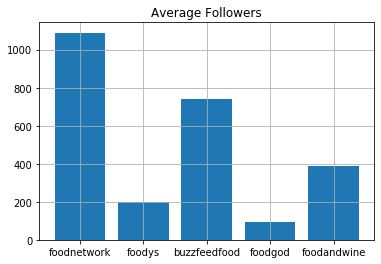

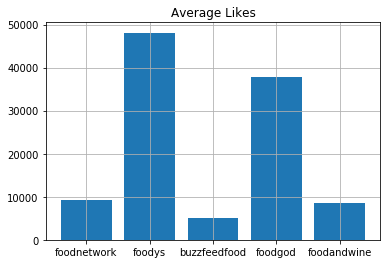

In [47]:
# Find out the likes of the top 10 posts of the 5 handles obtained earlier.
"""
Answer: As I mentioned earlier I will be using previous variables/lists/dictionaries so here I have used two lists 1
1. user_handles 
2. post_contents which have the likes count

NOTE: I won't be able to state anything from the bar graphs as it depends on lot of factors. 
"""
print("---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")
for i in range(5):
    print(user_handles[i],post_contents[i][1])
    
# Calculate the average likes for a handle.
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
# To store the average_likes for each handle
average_likes_list = []
for i in range(5):
    average_likes = post_contents[i][1]/post_contents[i][2]
    average_likes_list.append(average_likes)
    print(user_handles[i],format(average_likes,".0f"))


    
    
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = []
for i in range(5):
    avg_followers_count = int(user_id_followers[i][0]/average_likes_list[i])
    avg_followers.append(avg_followers_count)
    print(user_id_followers[i][1],avg_followers_count,':',int(average_likes_list[i]))


    
# Create a bar graph to depict the above obtained information.
plt.bar(user_handles,avg_followers)
plt.title('Average Followers')
plt.grid()
plt.show()

plt.bar(user_handles,average_likes_list)
plt.title('Average Likes')
plt.grid()
plt.show()

In [37]:
driver.close()
